# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#### Read dataset

In [2]:
df = pd.read_csv('train_model.csv')

In [3]:
df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,flag_own_realty,cnt_fam_members,amt_income_total,name_income_type,status
0,5008804,32,12.0,15,128.906371,1,1,2,427500.0,Working,0
1,5008805,32,12.0,14,123.938950,1,1,2,427500.0,Working,0
2,5008806,58,3.0,29,136.446864,1,1,2,112500.0,Working,0
3,5008808,52,8.0,4,125.327722,0,1,1,270000.0,Commercial associate,0
4,5008809,52,8.0,4,113.006746,0,1,1,270000.0,Commercial associate,0


In [4]:
df.dtypes

id                             int64
age                            int64
years_on_the_job             float64
nb_previous_loans              int64
avg_amount_loans_previous    float64
flag_own_car                   int64
flag_own_realty                int64
cnt_fam_members                int64
amt_income_total             float64
name_income_type              object
status                         int64
dtype: object

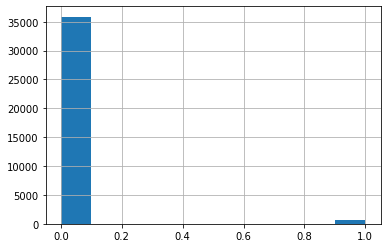

In [5]:
df.status.hist()

In [6]:
cust_df = df.copy()

## Dropping Outliers
In case we have some outliers can be eliminated to get a better model

In [23]:
cust_df.describe()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,flag_own_realty,cnt_fam_members,amt_income_total,Commercial associate,Pensioner,State servant,Student,Working
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,43.336012,5.679623,20.332392,129.528212,0.379708,0.672189,2.198453,1.866857e+05,0.232877,0.168747,0.081877,0.000302,0.516197
std,4.187524e+04,11.514500,6.427846,14.911849,11.619970,0.485321,0.469422,0.911686,1.017892e+05,0.422670,0.374533,0.274181,0.017368,0.499744
min,5.008804e+06,20.000000,0.000000,0.000000,100.035747,0.000000,0.000000,1.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,34.000000,1.000000,8.000000,123.268623,0.000000,0.000000,2.000000,1.215000e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.074614e+06,42.000000,4.000000,17.000000,128.599515,0.000000,1.000000,2.000000,1.575000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.115396e+06,53.000000,8.000000,30.000000,134.229576,1.000000,1.000000,3.000000,2.250000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.150487e+06,68.000000,43.000000,60.000000,399.048845,1.000000,1.000000,20.000000,1.575000e+06,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing values

In [7]:
cust_df['avg_amount_loans_previous'].fillna(cust_df['avg_amount_loans_previous'].mean(), inplace=True)
#cust_df['avg_amount_loans_previous'].fillna(0, inplace=True)
cust_df['years_on_the_job'].fillna(0, inplace=True)

##  Categoriacal values

In [8]:
cat_income_type = cust_df['name_income_type'].to_numpy().reshape(-1, 1)
ordinal_encoder = OrdinalEncoder()
income_type = ordinal_encoder.fit_transform(cat_income_type)

In [9]:
one_hot_encoder = OneHotEncoder()
income_type_1hot = one_hot_encoder.fit_transform(income_type)

In [10]:
for cat, name in enumerate(ordinal_encoder.categories_[0]):
    cust_df[name] = income_type_1hot[:, cat].toarray()
cust_df.drop('name_income_type', axis=1, inplace=True)

In [11]:
cust_df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,flag_own_realty,cnt_fam_members,amt_income_total,status,Commercial associate,Pensioner,State servant,Student,Working
0,5008804,32,12.0,15,128.906371,1,1,2,427500.0,0,0.0,0.0,0.0,0.0,1.0
1,5008805,32,12.0,14,123.938950,1,1,2,427500.0,0,0.0,0.0,0.0,0.0,1.0
2,5008806,58,3.0,29,136.446864,1,1,2,112500.0,0,0.0,0.0,0.0,0.0,1.0
3,5008808,52,8.0,4,125.327722,0,1,1,270000.0,0,1.0,0.0,0.0,0.0,0.0
4,5008809,52,8.0,4,113.006746,0,1,1,270000.0,0,1.0,0.0,0.0,0.0,0.0


## Train model

In [12]:
Y = cust_df['status']

cust_df.drop(['status'], axis=1, inplace=True)

X = cust_df

In [13]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 123)

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

## Evaluation Model

Accuracy Score is 0.97965
Precision Score is 0.9827
Recall Score is 0.9827
       0      1
0  10576    185
1    253  10508


/home/rick/.pyenv/versions/3.7.0/envs/day2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


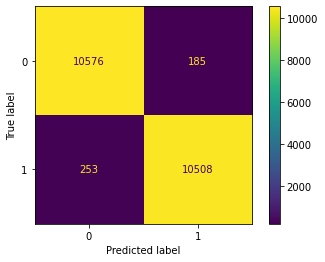

In [15]:

y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


/home/rick/.pyenv/versions/3.7.0/envs/day2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


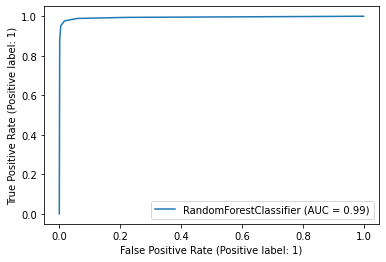

In [17]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [18]:
from joblib import dump, load

In [19]:
# dump model
dump(model, 'model_risk.joblib') 

['model_risk.joblib']

### Load model & predict

In [20]:
my_model = load('model_risk.joblib') 

In [21]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 1190.45, 1, 5, 1 ,420000.0, 0, 0.0, 1.0, 0.0, 0.0, 0.0],
    '5008807': [29, 2, 1, 100, 0, 1, 2 ,427500.0, 0, 0.0, 0.0, 0.0, 0.0, 1.0]
}

In [22]:
my_model.predict([d['5008804']])

/home/rick/.pyenv/versions/3.7.0/envs/day2/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])